<a href="https://colab.research.google.com/github/Fadelmuhammad013/Machine-learning/blob/main/02.%20Week%202/CitarumWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset
file_path = "sample_data/CitarumWater.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


In [2]:
# Menghapus kolom yang tidak relevan
df_clean = df.drop(columns=["No", "NamaSungai", "TitikPantau", "Waktu", "O2", "IP"])

# Mengonversi kolom suhu yang memiliki satuan derajat (°C)
df_clean["Temp"] = df_clean["Temp"].str.replace("°C", "").astype(float)

# Mengecek nilai yang hilang (NaN)
missing_values = df_clean.isnull().sum()

# Menampilkan hasil setelah pembersihan
df_clean.head(), missing_values


(     pH   Temp   TSS    DO   BOD    COD  Nitrat  FecalColiform  Fosfat  Class
 0  7.57  25.55  11.0  6.11  3.30   6.10    1.08        17000.0   0.043      3
 1  7.69  25.55  13.0  6.20  5.31  12.50    1.85        28000.0   0.011      3
 2  7.39  25.55  15.0  3.61  7.40  23.50    1.25        90000.0   0.230      3
 3  7.49  25.55  17.0  3.17  8.13  27.50    1.21       300000.0   0.057      3
 4  7.17  25.55   6.0  6.82  2.89   5.44    1.04         3000.0   0.110      2,
 pH               0
 Temp             0
 TSS              0
 DO               0
 BOD              0
 COD              0
 Nitrat           0
 FecalColiform    0
 Fosfat           0
 Class            0
 dtype: int64)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Mengubah klasifikasi menjadi biner:
# Misalnya, jika Class <= 2 dianggap "Baik" (0) dan > 2 dianggap "Buruk" (1)
df_clean["Class"] = (df_clean["Class"] > 2).astype(int)

# Memisahkan fitur (X) dan label (y)
X = df_clean.drop(columns=["Class"])
y = df_clean["Class"]

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur untuk meningkatkan performa model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Menampilkan koefisien regresi
model.coef_, model.intercept_


(array([[ 5.20145520e-01,  8.74151137e-15, -4.46116766e-01,
          2.07801863e-01,  7.86351730e-01,  3.66522939e-01,
          6.04226741e-01,  4.62173658e+00,  2.14335437e+00]]),
 array([-4.53735403]))

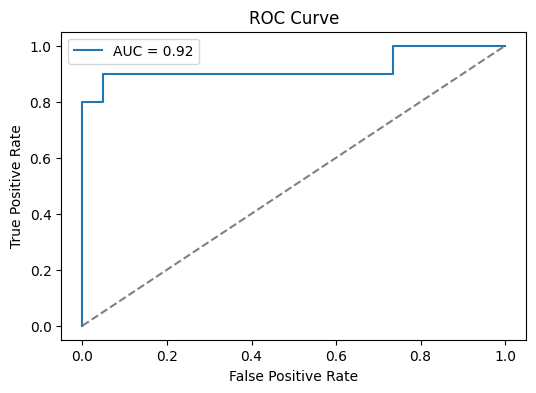

(0.992, 1.0, 0.6, 0.75, 0.9216326530612245)

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prediksi pada data uji
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Menampilkan hasil evaluasi
accuracy, precision, recall, f1, auc


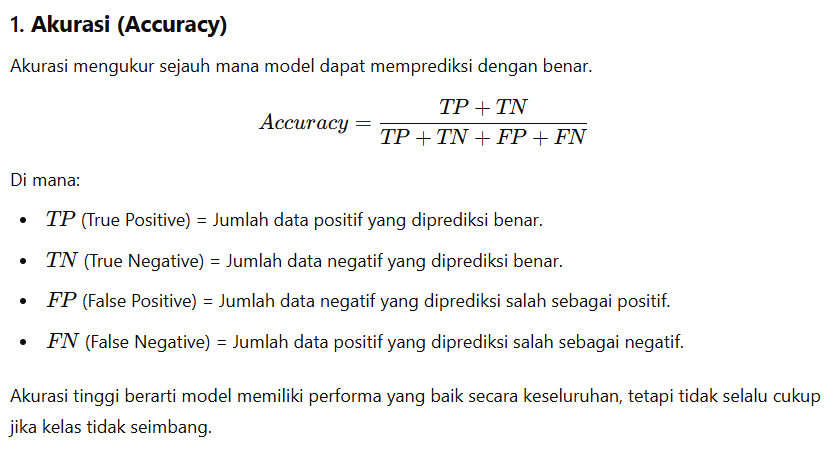

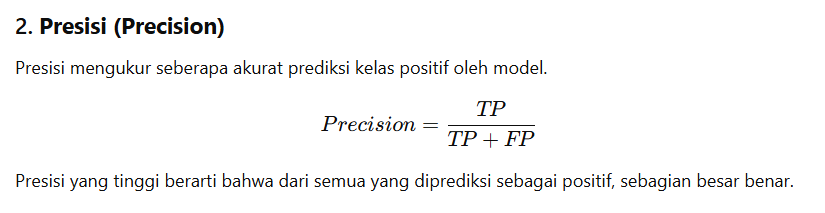

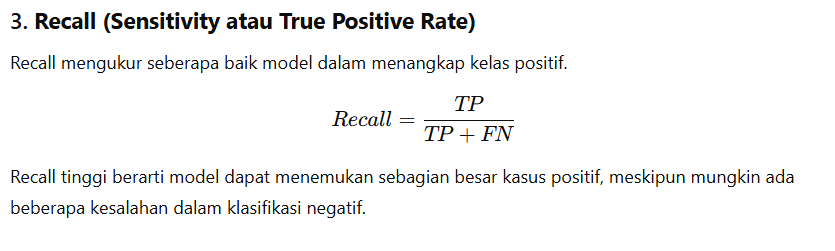

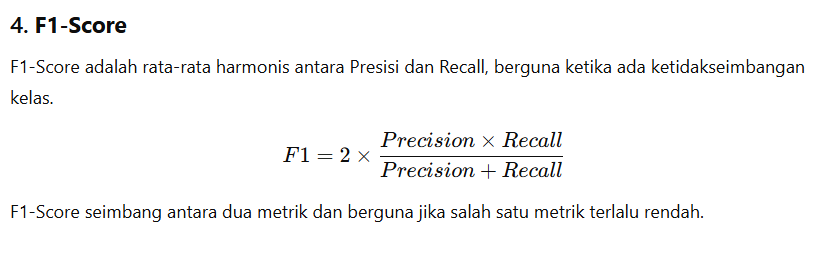

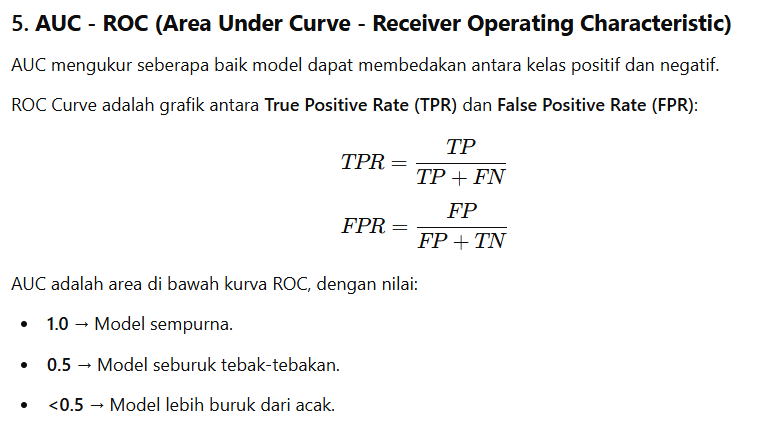